In [78]:
import numpy as np
import scipy as sc
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm


In [79]:
#Dataset
strike = [i for i in range(95,105)]*4

price1 =[8.67,7.14,5.98,4.93,4.09,3.99,3.43,3.01,2.72,2.53]
maturity1 = [0.25] * 10
price2 =[10.71,8.28,6.91,6.36,5.29,5.07,4.76,4.47,4.35,4.14]
maturity2 = [0.5] * 10
price3 =[11.79,8.95,8.07,7.03,6.18,6.04,5.76,5.50,5.50,5.39]
maturity3 = [0.75] * 10
price4 =[10.93,9.55,8.28,7.40,6.86,6.58,6.52,6.49,6.47,6.46]
maturity4 = [1] * 10
price = price1 + price2 + price3 + price4
maturity = maturity1 + maturity2 + maturity3 + maturity4
df = pd.DataFrame([strike,price,maturity],index=["Strike","Price","Maturity"]).transpose()

df

,Strike,Price,Maturity
0,95.0,8.67,0.25
1,96.0,7.14,0.25
2,97.0,5.98,0.25
3,98.0,4.93,0.25
4,99.0,4.09,0.25
5,100.0,3.99,0.25
6,101.0,3.43,0.25
7,102.0,3.01,0.25
8,103.0,2.72,0.25
9,104.0,2.53,0.25


I – Densités risque neutre 
 
1/ Sur les prix d’option données dans le tableau ci-après, calibrer une densité risque neutre en utilisant 
la formule de Breeden-Litzenberger et la technique de Shimko. Comparer avec une densité gaussienne. 

Densité risque-neutre – Breeden-Litzenberger

q(ST) = e^r(T−t)*∂2C(t,St ,K ,T )/∂K2∣∣∣K=ST

In [118]:
df_3M = df[df['Maturity'] == 0.25]
df_6M = df[df['Maturity'] == 0.5]
df_9M = df[df['Maturity'] == 0.75]
df_1Y = df[df['Maturity'] == 1]


,Strike,Price,Maturity,Sigma
30,95.0,10.93,1.0,0.289401
31,96.0,9.55,1.0,0.250007
32,97.0,8.28,1.0,0.214378
33,98.0,7.40,1.0,0.189559
34,99.0,6.86,1.0,0.173911
35,100.0,6.58,1.0,0.165124
36,101.0,6.52,1.0,0.161991
37,102.0,6.49,1.0,0.159660
38,103.0,6.47,1.0,0.157618
39,104.0,6.46,1.0,0.155858


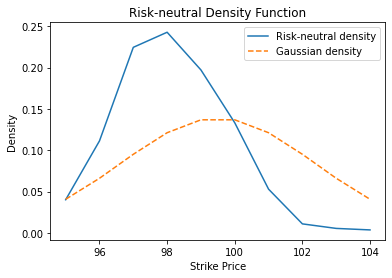

In [89]:
# Constants
r = 0  # Risk-free interest rate
t = 1.0   # Time to expiration

# Option prices for different strikes
strike_prices = df_1Y['Strike'].values
call_option_prices = df_1Y['Price'].values

# Calculate risk-neutral densities using the Breeden-Litzenberger formula
risk_neutral_densities = (
    np.exp(r * t) * np.gradient(np.gradient(call_option_prices, strike_prices), strike_prices)
)

# Normalize to obtain a probability density function
probability_density_function = risk_neutral_densities / np.trapz(risk_neutral_densities, strike_prices)

mu, sigma = norm.fit(strike_prices)
gaussian_density = norm.pdf(strike_prices, mu, sigma)
# Plot the results
plt.plot(strike_prices, probability_density_function, label='Risk-neutral density')
plt.plot(strike_prices, gaussian_density, label='Gaussian density', linestyle='--')
plt.title('Risk-neutral Density Function')
plt.xlabel('Strike Price')
plt.ylabel('Density')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Sigma')

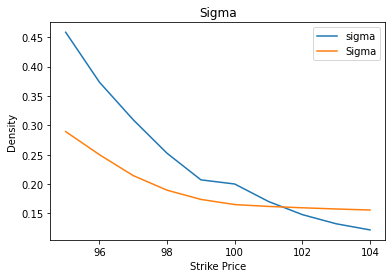

In [108]:
#let's do interpolation for the implied vol with a step of 0.05
#Y = Y1 + (Y2 – Y1)/(X2 – X1) * (X * X1)   for fixed X

strike_range = np.arange(95, 104.05, 0.05)
# Interpolate sigma values for the specified strikes
interpolated_sigma = np.interp(strike_range, df['Strike'], df['Sigma'])

# Create a new DataFrame with the interpolated values
interpolated_df = pd.DataFrame({'Strike': strike_range, 'Interpolated_Sigma': interpolated_sigma})

# Display the result
#print(interpolated_df)

plt.plot(interpolated_df['Strike'].values, interpolated_df['Interpolated_Sigma'].values, label='sigma')
plt.plot(df_1Y['Strike'].values, df_1Y['Sigma'].values, label='Sigma')
plt.xlabel('Strike Price')
plt.ylabel('Density')
plt.legend()
plt.title('Sigma')

In [116]:
df_1Y['Sigma']

30    0.289401
31    0.250007
32    0.214378
33    0.189559
34    0.173911
35    0.165124
36    0.161991
37    0.159660
38    0.157618
39    0.155858
Name: Sigma, dtype: float64

In [95]:
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_vega(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm.pdf(d1)

def implied_volatility_newton_raphson(S0, K, T, r, market_price, sigma_initial_guess=0.2, max_iterations=300, epsilon=1e-6):
    sigma = sigma_initial_guess
    for i in range(max_iterations):
        price = black_scholes_call_price(S0, K, T, r, sigma)
        vega = black_scholes_vega(S0, K, T, r, sigma)
        
        sigma = sigma - (price - market_price) / vega

        if abs(price - market_price) < epsilon:
            return sigma
    return sigma

In [96]:
df['Sigma'] = df.apply(lambda row: implied_volatility_newton_raphson(
    S0=row['Strike'],
    K=row['Strike'],
    T=row['Maturity'],
    r=0,
    market_price=row['Price']), axis=1)

print(df)

    Strike  Price  Maturity     Sigma
0     95.0   8.67      0.25  0.458528
1     96.0   7.14      0.25  0.373403
2     97.0   5.98      0.25  0.309373
3     98.0   4.93      0.25  0.252365
4     99.0   4.09      0.25  0.207206
5    100.0   3.99      0.25  0.200112
6    101.0   3.43      0.25  0.170304
7    102.0   3.01      0.25  0.147974
8    103.0   2.72      0.25  0.132413
9    104.0   2.53      0.25  0.121976
10    95.0  10.71      0.50  0.400981
11    96.0   8.28      0.50  0.306346
12    97.0   6.91      0.50  0.252865
13    98.0   6.36      0.50  0.230312
14    99.0   5.29      0.50  0.189562
15   100.0   5.07      0.50  0.179848
16   101.0   4.76      0.50  0.167164
17   102.0   4.47      0.50  0.155429
18   103.0   4.35      0.50  0.149782
19   104.0   4.14      0.50  0.141173
20    95.0  11.79      0.75  0.360672
21    96.0   8.95      0.75  0.270460
22    97.0   8.07      0.75  0.241241
23    98.0   7.03      0.75  0.207910
24    99.0   6.18      0.75  0.180866
25   100.0  